In [3]:
!pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.3 MB/s eta 0:00:00


In [5]:
!pip install textblob_fr

   ---------------------------------------- 0.0/561.2 kB ? eta -:--:--
   ------------------ --------------------- 262.1/561.2 kB ? eta -:--:--
   ---------------------------------------- 561.2/561.2 kB 2.1 MB/s eta 0:00:00


In [7]:
!pip install wordcloud

In [9]:
!pip install langdetect

     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     ---------------------------------------- 0.0/981.5 kB ? eta -:--:--
     -------------------- ----------------- 524.3/981.5 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 981.5/981.5 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993251 sha256=7be28c02da891275e9fe5668fa46b5275d329428a0f015a3187daa187f1d41fd
  Stored in directory: c:\users\farouha\appdata\local\pip\cache\wheels\c1\67\88\e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect


In [2]:
!pip install reportlab

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ----- ---------------------------------- 0.3/2.0 MB ? eta -:--:--
   ---------- ----------------------------- 0.5/2.0 MB 289.3 kB/s eta 0:00:05
   ---------------- ----------------------- 0.8/2.0 MB 435.8 kB/s eta 0:00:03
   ---------------- ----------------------- 0.8/2.0 MB 435.8 kB/s eta 0:00:03
   --------------------- ------------------ 1.0/2.0 MB 524.3 kB/s eta 0:00:02
   -------------------------- ------------- 1.3/2.0 MB 578.7 kB/s eta 0:00:02
   -------------------------- ------------- 1.3/2.0 MB 578

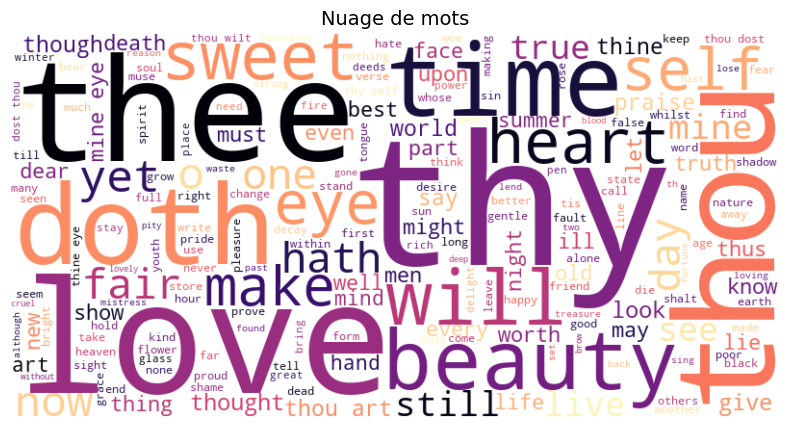

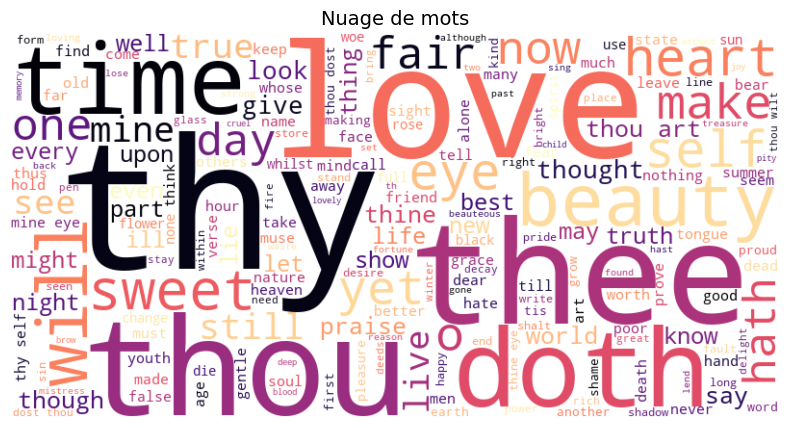

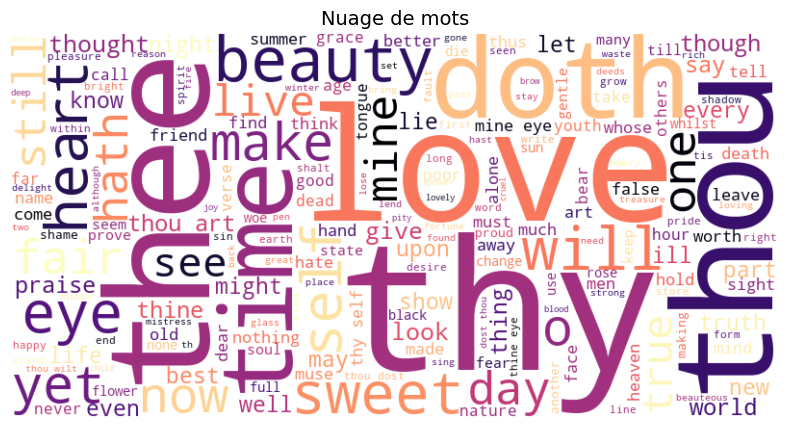

In [1]:
#############################GOOD222222222222222222##############################
import tkinter as tk
from tkinter import messagebox, filedialog
from collections import Counter
import string
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from heapq import nlargest
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from langdetect import detect


# 🧽 Fonction de nettoyage et d'analyse
def analyser_texte():
    texte = text_entry.get("1.0", tk.END).strip()
    if not texte:
        messagebox.showerror("Erreur", "Veuillez entrer un texte.")
        return

    # Détection de langue
    try:
        langue_detectee = detect(texte)
        if langue_detectee != 'fr':
            messagebox.showwarning("Langue détectée", f"⚠️ Le texte semble être en {langue_detectee.upper()}, pas en français.")
    except:
        messagebox.showerror("Erreur", "Impossible de détecter la langue.")
        return

    texte_clean = texte.lower().translate(str.maketrans('', '', string.punctuation))
    stopwords_fr = set([
        "le", "la", "les", "de", "des", "du", "et", "en", "un", "une", "dans",
        "ce", "cette", "il", "elle", "on", "pour", "par", "est", "a", "au", "aux",
        "sur", "avec", "plus", "pas", "ne", "que", "qui", "nous", "vous", "se",
        "sont", "mais", "où", "encore"
    ])
    mots = texte_clean.split()
    mots_filtrés = [mot for mot in mots if mot not in stopwords_fr and mot.isalpha()]
    frequence = Counter(mots_filtrés)
    frequence_str = "\n".join([f"{mot} : {freq}" for mot, freq in frequence.most_common(10)])

    # Statistiques de base
    nb_mots = len(mots)
    nb_phrases = len(texte.split('.'))

    # Résumé
    nb_res = int(nb_spinbox.get())
    resume = resume_texte(texte, nb_phrases=nb_res)

    # Sentiment
    tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
    blob = tb(texte)
    sentiment = f"Polarité : {blob.sentiment[0]:.2f}   (de -1 à 1)\nSubjectivité : {blob.sentiment[1]:.2f}   (de 0 à 1)"

    # Wordcloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(" ".join(mots_filtrés))

    # Affichage
    result_text.delete(1.0, tk.END)
    result_text.insert(tk.END, f"📊 Statistiques :\nMots : {nb_mots} | Phrases : {nb_phrases}\n\n")
    result_text.insert(tk.END, f"🔢 Mots les plus fréquents :\n{frequence_str}\n\n")
    result_text.insert(tk.END, f"📝 Résumé ({nb_res} phrases) :\n{resume}\n\n")
    result_text.insert(tk.END, f"📈 Analyse de sentiment :\n{sentiment}\n\n")

    # Affichage nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Nuage de mots", fontsize=14)
    plt.show()


# 🧠 Résumé intelligent
def resume_texte(texte, nb_phrases=3):
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np

    phrases = [phrase.strip() for phrase in texte.split('.') if phrase.strip()]
    if len(phrases) <= nb_phrases:
        return '. '.join(phrases) + '.'

    stopwords_fr = set([
        "le", "la", "les", "de", "des", "du", "et", "en", "un", "une", "dans",
        "ce", "cette", "il", "elle", "on", "pour", "par", "est", "a", "au", "aux",
        "sur", "avec", "plus", "pas", "ne", "que", "qui", "nous", "vous", "se",
        "sont", "mais", "où", "encore"
    ])
    tfidf = TfidfVectorizer(stop_words=list(stopwords_fr))
    tfidf_matrix = tfidf.fit_transform(phrases)
    texte_vector = np.asarray(tfidf_matrix.sum(axis=0)).reshape(1, -1)
    phrase_scores = cosine_similarity(tfidf_matrix, texte_vector)
    scores = phrase_scores.flatten()
    indices_meilleures = np.argsort(scores)[-nb_phrases:]
    indices_meilleures.sort()
    meilleures_phrases = [phrases[i] for i in indices_meilleures]
    return '. '.join(meilleures_phrases) + '.'


# 📂 Chargement de fichier
def charger_fichier():
    fichier = filedialog.askopenfilename(filetypes=[("Fichiers texte", "*.txt")])
    if fichier:
        with open(fichier, "r", encoding="utf-8") as f:
            contenu = f.read()
            text_entry.delete("1.0", tk.END)
            text_entry.insert(tk.END, contenu)


# 💾 Exportation
def exporter_resultats():
    with open("analyse_resultat.txt", "w", encoding="utf-8") as f:
        f.write(result_text.get("1.0", tk.END))
    messagebox.showinfo("Exportation", "Résultats exportés avec succès dans 'analyse_resultat.txt'")


# 🎨 Interface graphique
root = tk.Tk()
root.title("🧠 Analyseur de Texte Intelligent")
root.geometry("850x750")  # Taille de la fenêtre plus grande

# Ajouter un fond coloré pour la fenêtre
root.config(bg="#f4f4f9")

# Zone de texte
label = tk.Label(root, text="Entrez votre texte :", font=("Arial", 14, "bold"), bg="#f4f4f9")
label.pack(pady=10)

text_entry = tk.Text(root, height=10, width=70, font=("Arial", 12), wrap=tk.WORD, bd=2, relief="solid", padx=10, pady=10)
text_entry.pack(pady=10)

# Paramètres
param_frame = tk.Frame(root, bg="#f4f4f9")
param_frame.pack()

tk.Label(param_frame, text="🧩 Nombre de phrases pour le résumé :", font=("Arial", 12), bg="#f4f4f9").grid(row=0, column=0, padx=10, pady=10)
nb_spinbox = tk.Spinbox(param_frame, from_=1, to=10, width=5, font=("Arial", 12), bd=2)
nb_spinbox.grid(row=0, column=1, padx=10, pady=10)

# Boutons avec une meilleure présentation
btn_frame = tk.Frame(root, bg="#f4f4f9")
btn_frame.pack(pady=20)

tk.Button(btn_frame, text="📂 Charger un fichier", command=charger_fichier, font=("Arial", 12), bg="#4CAF50", fg="white", bd=2, relief="raised", width=20).grid(row=0, column=0, padx=10)
tk.Button(btn_frame, text="📊 Analyser", command=analyser_texte, font=("Arial", 12), bg="#2196F3", fg="white", bd=2, relief="raised", width=20).grid(row=0, column=1, padx=10)
tk.Button(btn_frame, text="💾 Exporter les résultats", command=exporter_resultats, font=("Arial", 12), bg="#FFC107", fg="white", bd=2, relief="raised", width=20).grid(row=0, column=2, padx=10)

# Résultats
result_text = tk.Text(root, height=20, width=80, font=("Arial", 11), wrap=tk.WORD, bd=2, relief="solid", padx=10, pady=10)
result_text.pack(pady=10)

# Lancement
root.mainloop()
